<a href="https://colab.research.google.com/github/dev777777/Deva/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [16]:
import pandas as pd
df=pd.read_csv(path+"/Titanic-Dataset.csv")


In [17]:
import os
print(os.listdir(path))

['Titanic-Dataset.csv']


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
# handle missing age values
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-2404358891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [24]:
# handle embarked
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-3107664595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [25]:
#drop cabin
df.drop("Cabin", axis=1, inplace=True)

In [28]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
#Q1. Who survived more: males or females?
df.groupby("Sex")["Survived"].sum()

,Survived
Sex,
female,233
male,109


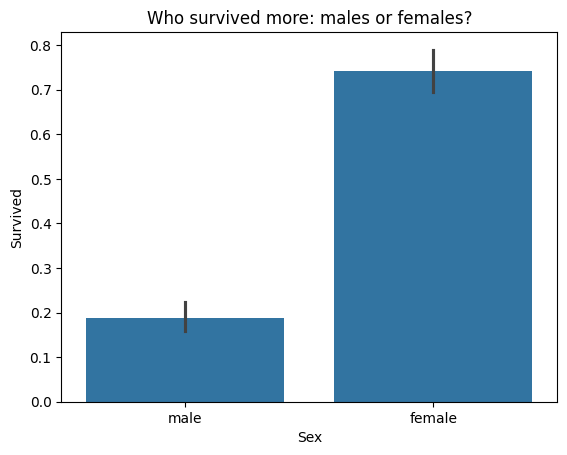

In [40]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("Who survived more: males or females?")
plt.ylabel("Survived")
plt.xlabel("Sex")
plt.show()

In [32]:
# Females are more survived as compare to Men


In [37]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


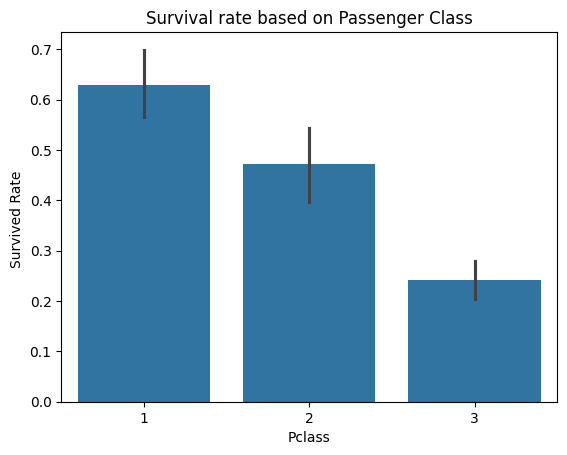

In [39]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival rate based on Passenger Class")
plt.ylabel("Survived Rate ")
plt.xlabel("Pclass")
plt.show()

In [41]:
# Compere 1st,2nd and 3rd Class Survival who acess the better lifebots


In [44]:
# Crete Age Group
bins =[0,12,18,35,60,80]
labels=["Child","Teen","younger adult","Adult","Eleder"]
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels)

In [46]:
df.groupby('Age Group')['Survived'].mean()

/tmp/ipython-input-1536356508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Survived'].mean()


,Survived
Age Group,
Child,0.579710
Teen,0.428571
younger adult,0.353271
Adult,0.400000
Eleder,0.227273


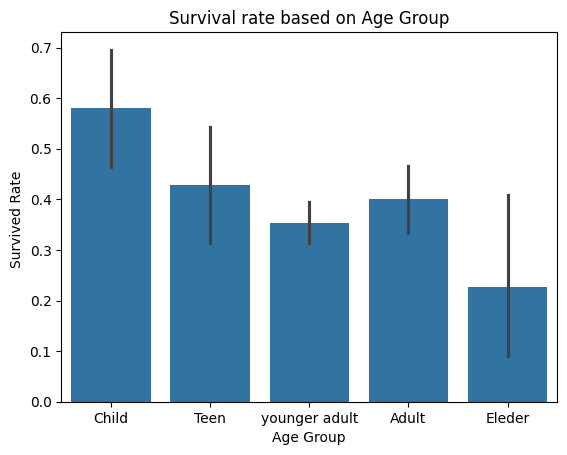

In [47]:
sns.barplot(x='Age Group',y='Survived',data=df)
plt.title("Survival rate based on Age Group")
plt.ylabel("Survived Rate ")
plt.xlabel("Age Group")
plt.show()

In [48]:
# Child are higher survived and eleder are low


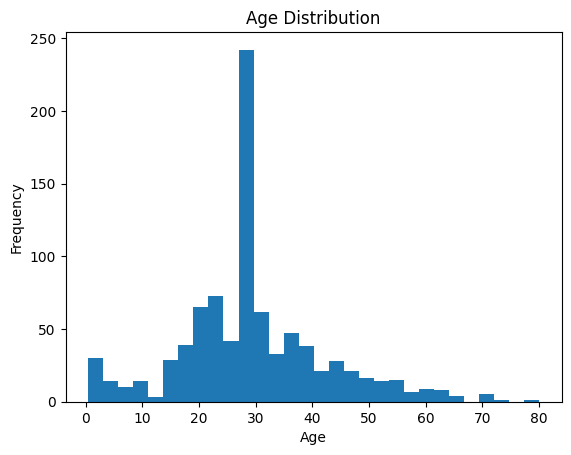

In [52]:
plt.hist(df['Age'],bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [53]:
## majority of Passengers age b/w 20-30,few elderly onboard

In [ ]:
###conclusion
  Females had much higher survival rates than males
 • Passenger class strongly influenced survival
 • Children were more likely to survive
 • Data cleaning is essential before analysis